# **Ten personal data analysis queries on data sets of this project**

**Query 1 : Determine the highest rating given**

In [1]:
import pandas as pd
df_bookings = pd.read_csv("datasets/fact_bookings.csv")

In [2]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [3]:
df_bookings['ratings_given'].max()

5.0

**Query 2 : Determine the maximum stay among RT4 room category**
    

In [4]:
import re
from datetime import date

def stay(df):
    year = []
    month = []
    day = []
    for i in df:
        l = re.split(r'/|-', i)
        year.append(int(l[2]))
        month.append(int(l[1]))
        day.append(int(l[0]))
    return year, month, day

n_days = []
year1, month1, day1 = stay(df_bookings['check_in_date'][df_bookings['room_category'] == 'RT4'])
year2, month2, day2 = stay(df_bookings['checkout_date'][df_bookings['room_category'] == 'RT4'])
for j in range(len(year1)):    stay_duration = (date(year2[j], month2[j], day2[j])-date(year1[j], month1[j], day1[j])).days)
    if stay_duration < 10:        n_days.append(stay_duration)n_days.sort()
print(str(n_days[-1]) + ' ' + 'days')

6 days


**Query 3 : Number of clients who cancelled the booking**


In [5]:
df_bookings['booking_status'].value_counts()

booking_status
Checked Out    94411
Cancelled      33420
No Show         6759
Name: count, dtype: int64

**Query 4 : How many successful bookings from each room category**

In [6]:
df_agg_bookings = pd.read_csv("datasets/fact_aggregated_bookings.csv")
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [7]:
df_agg_bookings.groupby('room_category')['successful_bookings'].sum()

room_category
RT1    38651
RT2    49534
RT3    30566
RT4    16082
Name: successful_bookings, dtype: int64

**Query 5 : How many successful bookings from each booking platform**

In [8]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,1/5/2022,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,1/5/2022,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,1/5/2022,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,1/5/2022,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,1/5/2022,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [9]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,1-May-22,RT1,25,30.0
1,19562,1-May-22,RT1,28,30.0
2,19563,1-May-22,RT1,23,30.0
3,17558,1-May-22,RT1,30,19.0
4,16558,1-May-22,RT1,18,19.0


In [10]:
df_bookings['check_in_date'].head()

0    1/5/2022
1    1/5/2022
2    1/5/2022
3    1/5/2022
4    1/5/2022
Name: check_in_date, dtype: object

In [11]:
df_agg_bookings['check_in_date'].head()

0    1-May-22
1    1-May-22
2    1-May-22
3    1-May-22
4    1-May-22
Name: check_in_date, dtype: object

In [27]:
df_agg_bookings['check_in_date'] = pd.to_datetime(df_agg_bookings['check_in_date'], format="mixed")
df_bookings['check_in_date'] = pd.to_datetime(df_bookings['check_in_date'], format="mixed")

In [28]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0


In [29]:
df_bookings.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,May012216558RT11,16558,27-04-22,2022-01-05,2/5/2022,-3.0,RT1,direct online,1.0,Checked Out,10010,10010
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,2022-01-05,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
3,May012216558RT14,16558,28-04-22,2022-01-05,2/5/2022,-2.0,RT1,others,NaN,Cancelled,9100,3640
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920


In [34]:
df_merged = pd.merge(df_agg_bookings,df_bookings,on="check_in_date")
df_merged.head()

,property_id_x,check_in_date,room_category_x,successful_bookings,capacity,booking_id,property_id_y,booking_date,checkout_date,no_guests,room_category_y,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16559,2022-05-05,RT1,16,30.0,May052216558RT11,16558,15-04-22,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010
1,16559,2022-05-05,RT1,16,30.0,May052216558RT12,16558,30-04-22,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,16559,2022-05-05,RT1,16,30.0,May052216558RT13,16558,1/5/2022,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010
3,16559,2022-05-05,RT1,16,30.0,May052216558RT14,16558,3/5/2022,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100
4,16559,2022-05-05,RT1,16,30.0,May052216558RT15,16558,30-04-22,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920


In [65]:
df_merged['booking_platform'].fillna("others",inplace=True)
df_merged.head()

,property_id_x,check_in_date,room_category_x,successful_bookings,capacity,booking_id,property_id_y,booking_date,checkout_date,no_guests,room_category_y,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
0,16559,2022-05-05,RT1,16,30.0,May052216558RT11,16558,15-04-22,7/5/2022,3.0,RT1,tripster,5.0,Checked Out,10010,10010
1,16559,2022-05-05,RT1,16,30.0,May052216558RT12,16558,30-04-22,7/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,16559,2022-05-05,RT1,16,30.0,May052216558RT13,16558,1/5/2022,6/5/2022,3.0,RT1,direct offline,5.0,Checked Out,10010,10010
3,16559,2022-05-05,RT1,16,30.0,May052216558RT14,16558,3/5/2022,6/5/2022,2.0,RT1,tripster,3.0,Checked Out,9100,9100
4,16559,2022-05-05,RT1,16,30.0,May052216558RT15,16558,30-04-22,10/5/2022,4.0,RT1,others,4.0,Checked Out,10920,10920


In [35]:
df_merged.groupby('booking_platform')['successful_bookings'].sum()

booking_platform
direct offline     6782852
direct online     13612985
journey            8264104
logtrip           14925851
makeyourtrip      27041124
others            55690585
tripster           9793809
Name: successful_bookings, dtype: int64

In [66]:
df_merged['successful_bookings'].sum()

136111310

In [37]:
6782852+13612985+8264104+14925851+27041124+55690585+9793809

136111310

**Query 6 : Figure out the time period of the given data sets and plot a suitable graph to compare the number of bookings per month**

In [123]:
newdf = pd.read_csv("datasets/new_data_august.csv")
newdf.head()

,property_id,property_name,category,city,room_category,room_class,check_in_date,mmm yy,week no,day_type,successful_bookings,capacity,occ%
0,16559,Atliq Exotica,Luxury,Mumbai,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,30,100.00
1,19562,Atliq Bay,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,21,30,70.00
2,19563,Atliq Palace,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,23,30,76.67
3,19558,Atliq Grands,Luxury,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,30,40,75.00
4,19560,Atliq City,Business,Bangalore,RT1,Standard,01-Aug-22,Aug-22,W 32,weekeday,20,26,76.92


In [84]:
df_date = pd.read_csv("datasets/dim_date.csv")

In [85]:
df_date.head()

,date,mmm yy,week no,day_type
0,01-May-22,May 22,W 19,weekend
1,02-May-22,May 22,W 19,weekeday
2,03-May-22,May 22,W 19,weekeday
3,04-May-22,May 22,W 19,weekeday
4,05-May-22,May 22,W 19,weekeday


In [93]:
df_date['date'] = pd.to_datetime(df_date['date'], format='mixed')
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [89]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0


In [101]:
new_merged = pd.merge(df_date, df_agg_bookings, left_on = 'date', right_on = 'check_in_date')
new_merged.head()

,date,mmm yy,week no,day_type,property_id,check_in_date,room_category,successful_bookings,capacity
0,2022-05-01,May 22,W 19,weekend,16559,2022-05-01,RT1,25,30.0
1,2022-05-01,May 22,W 19,weekend,19562,2022-05-01,RT1,28,30.0
2,2022-05-01,May 22,W 19,weekend,19563,2022-05-01,RT1,23,30.0
3,2022-05-01,May 22,W 19,weekend,17558,2022-05-01,RT1,30,19.0
4,2022-05-01,May 22,W 19,weekend,16558,2022-05-01,RT1,18,19.0


In [105]:
finaldf = pd.concat([new_merged, newdf], axis = 0)
finaldf.head()

,date,mmm yy,week no,day_type,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city,room_class,occ%
0,2022-05-01,May 22,W 19,weekend,16559,2022-05-01 00:00:00,RT1,25,30.0,NaN,NaN,NaN,NaN,NaN
1,2022-05-01,May 22,W 19,weekend,19562,2022-05-01 00:00:00,RT1,28,30.0,NaN,NaN,NaN,NaN,NaN
2,2022-05-01,May 22,W 19,weekend,19563,2022-05-01 00:00:00,RT1,23,30.0,NaN,NaN,NaN,NaN,NaN
3,2022-05-01,May 22,W 19,weekend,17558,2022-05-01 00:00:00,RT1,30,19.0,NaN,NaN,NaN,NaN,NaN
4,2022-05-01,May 22,W 19,weekend,16558,2022-05-01 00:00:00,RT1,18,19.0,NaN,NaN,NaN,NaN,NaN


In [106]:
finaldf['mmm yy'].unique()

array(['May 22', 'Jun 22', 'Jul 22', 'Aug-22'], dtype=object)

In [107]:
finaldf['successful_bookings'].fillna(0, inplace=True)
finaldf.head()

,date,mmm yy,week no,day_type,property_id,check_in_date,room_category,successful_bookings,capacity,property_name,category,city,room_class,occ%
0,2022-05-01,May 22,W 19,weekend,16559,2022-05-01 00:00:00,RT1,25,30.0,NaN,NaN,NaN,NaN,NaN
1,2022-05-01,May 22,W 19,weekend,19562,2022-05-01 00:00:00,RT1,28,30.0,NaN,NaN,NaN,NaN,NaN
2,2022-05-01,May 22,W 19,weekend,19563,2022-05-01 00:00:00,RT1,23,30.0,NaN,NaN,NaN,NaN,NaN
3,2022-05-01,May 22,W 19,weekend,17558,2022-05-01 00:00:00,RT1,30,19.0,NaN,NaN,NaN,NaN,NaN
4,2022-05-01,May 22,W 19,weekend,16558,2022-05-01 00:00:00,RT1,18,19.0,NaN,NaN,NaN,NaN,NaN


In [109]:
finaldf.groupby('mmm yy')['successful_bookings'].sum()

mmm yy
Aug-22      152
Jul 22    45158
Jun 22    43712
May 22    45963
Name: successful_bookings, dtype: int64

<Axes: ylabel='successful_bookings'>

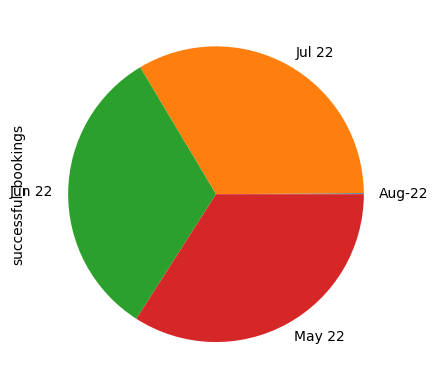

In [120]:
finaldf.groupby('mmm yy')['successful_bookings'].sum().plot(kind="pie")

**Query 7 : Calculate the percentage of successful bookings on weekdays and weekends except for August**

In [121]:
df_date.head()

,date,mmm yy,week no,day_type
0,2022-05-01,May 22,W 19,weekend
1,2022-05-02,May 22,W 19,weekeday
2,2022-05-03,May 22,W 19,weekeday
3,2022-05-04,May 22,W 19,weekeday
4,2022-05-05,May 22,W 19,weekeday


In [132]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0


In [133]:
merge1 = pd.merge(df_date, df_agg_bookings, left_on = 'date', right_on = 'check_in_date')
merge1.head()

,date,mmm yy,week no,day_type,property_id,check_in_date,room_category,successful_bookings,capacity
0,2022-05-01,May 22,W 19,weekend,16559,2022-05-01,RT1,25,30.0
1,2022-05-01,May 22,W 19,weekend,19562,2022-05-01,RT1,28,30.0
2,2022-05-01,May 22,W 19,weekend,19563,2022-05-01,RT1,23,30.0
3,2022-05-01,May 22,W 19,weekend,17558,2022-05-01,RT1,30,19.0
4,2022-05-01,May 22,W 19,weekend,16558,2022-05-01,RT1,18,19.0


In [143]:
a,b = merge1.groupby('day_type')['successful_bookings'].sum()
a, b

(84389, 50444)

In [150]:
Percentage_weekdays = round((a/(a+b))*100,2)
Percentage_weekends = round((b/(a+b))*100,2)
Percentage_weekdays, Percentage_weekends

(62.59, 37.41)

**Query 8 : We have occupancy rate for new August data, but not for earlier three months. Calculate it and create a new dataframe series for the same.**

In [151]:
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity
0,16559,2022-05-01,RT1,25,30.0
1,19562,2022-05-01,RT1,28,30.0
2,19563,2022-05-01,RT1,23,30.0
3,17558,2022-05-01,RT1,30,19.0
4,16558,2022-05-01,RT1,18,19.0


In [153]:
df_agg_bookings['occ']  = round(df_agg_bookings['successful_bookings']/df_agg_bookings['capacity']*100,2)
df_agg_bookings.head()

,property_id,check_in_date,room_category,successful_bookings,capacity,occ
0,16559,2022-05-01,RT1,25,30.0,83.33
1,19562,2022-05-01,RT1,28,30.0,93.33
2,19563,2022-05-01,RT1,23,30.0,76.67
3,17558,2022-05-01,RT1,30,19.0,157.89
4,16558,2022-05-01,RT1,18,19.0,94.74


**Query 9 : Plot a graph and show how many bookings got cancelled, checked out and did'nt show.**

In [159]:
df_bookings.shape

(134590, 12)

In [158]:
df_bookings_new = df_bookings[df_bookings['no_guests']>0]
df_bookings_new.head()

,booking_id,property_id,booking_date,check_in_date,checkout_date,no_guests,room_category,booking_platform,ratings_given,booking_status,revenue_generated,revenue_realized
1,May012216558RT12,16558,30-04-22,2022-01-05,2/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640
2,May012216558RT13,16558,28-04-22,2022-01-05,4/5/2022,2.0,RT1,logtrip,5.0,Checked Out,9100000,9100
4,May012216558RT15,16558,27-04-22,2022-01-05,2/5/2022,4.0,RT1,direct online,5.0,Checked Out,10920,10920
5,May012216558RT16,16558,1/5/2022,2022-01-05,3/5/2022,2.0,RT1,others,4.0,Checked Out,9100,9100
6,May012216558RT17,16558,28-04-22,2022-01-05,6/5/2022,2.0,RT1,others,NaN,Cancelled,9100,3640


In [160]:
df_bookings_new.shape

(134578, 12)

<Axes: xlabel='booking_status'>

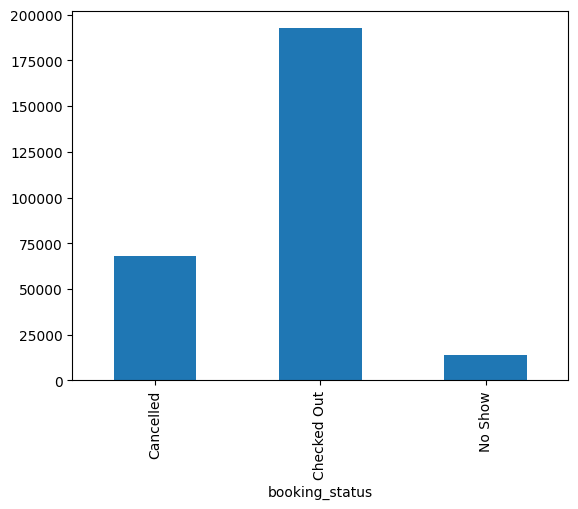

In [161]:
df_bookings_new.groupby("booking_status")['no_guests'].sum().plot(kind = "bar")

**Query 10: List all the property names and their counts**

In [163]:
df_hotels = pd.read_csv("datasets/dim_hotels.csv")
df_hotels.head()

,property_id,property_name,category,city
0,16558,Atliq Grands,Luxury,Delhi
1,16559,Atliq Exotica,Luxury,Mumbai
2,16560,Atliq City,Business,Delhi
3,16561,Atliq Blu,Luxury,Delhi
4,16562,Atliq Bay,Luxury,Delhi


In [167]:
df_hotels['property_name'].value_counts()

property_name
Atliq Grands     4
Atliq Exotica    4
Atliq City       4
Atliq Blu        4
Atliq Bay        4
Atliq Palace     4
Atliq Seasons    1
Name: count, dtype: int64